# Algoritmos disponibles en machine learning

![image info](../img/tipos_ml.png)

# Análisis exploratorio de datos

## Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Lectura de los datos iniciales

In [2]:
directorio_data = '../data/'

In [3]:
file_dataset_inicial = directorio_data + 'beer_reviews.csv'

df = pd.read_csv(file_dataset_inicial)
df.drop(columns=['index'], inplace=True)
df = df.loc[:, ['beer_beerid','beer_name', 'brewery_id','brewery_name', 'beer_style','beer_abv', 'review_profilename','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']]
df.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5


## Entendiendo nuestros datos

#### ¿Qué significa cada campo?

(https://www.singingboysbrewing.com/blog/tasting-and-evaluating-your-beer-an-introduction)

1. **beer_beerid** a unique ID indicating the beer reviewed

1. **beer_name** name of the beer

1. **brewery_id** a unique ID indicating the brewery

1. **brewery_name** the brewery name

1. **beer_style** the style of the beer

1. **beer_abv** the alcohol by volume of the beer

1. **review_profilename** profile name of the user

1. **review_time** the date/time of the review

1. **review_aroma** <br> Smell first - there are volatile compounds that may quickly dissipate. Plus, aroma helps set up our sense of taste. You can help concentrate the aromas by covering the top of the glass with your hand and gently swirling the beer. Short, quick sniffs are most effective, usually. Look for: <br>
    1. malt and grain aromas (bread, caramel, biscuit, toast, chocolate, roasted, coffee)
    1. hop aromas (earthiness, citrus, spice, pine, floral, herbal)
    1. esters (pit fruits, plums, cherries, apples, pears)
    1. other (spices like pepperiness or other additions like fruit the brewer may have used)


    Aromas trigger memories - linger on those memories, use them to help you describe the aroma. 

1. **review_appearance** <br> The color of the beer, the clarity of the beer, and the color/size/retention of the head.

1. **review_palate** <br> Take a sip of the beer and hold it in your mouth for a moment before swallowing. Just as you did when evaluating the aroma, look for malt, grain and hop flavors. <br> In addition to hop flavors, hops also add bitterness and, when tasting the beer, you can note the level of bitterness and its quality.  Another component of flavor is the balance between malt flavors and bitterness. Look for the balance of the flavors, whether the beer is malt-forward or dominated by a strong bracing bitterness, or in balance. Look for both components of hops – bitterness and flavor, they are different. <br> Similar to ester aromas, you should note esters in the flavors, which often arise from yeast and fermentation.  Other yeast and fermentation character can also present, such as spices like black pepper or coriander. <br> Some beers will have purposeful tartness or sourness. Acidity plays an important role in beer flavor. Is the beer dry or sweet? Some flavors hit your palate first and fade, others last throughout the finish and aftertaste. <br> As you taste, try a technique called 'aspiration' - either hold some of the beer in your mouth as you breathe in and out over it or immediately after swallowing the beer, breathe out through your nose. Aspiration gets aroma molecules up into your nose, which enhances your perception of flavors, as aroma and flavor are interconnected. 

1. **review_taste** (mouthfeel) <br> While tasting the beer, pay attention to its character and qualities on your tongue. Is the beer full-, medium-, or light-bodied? Is the carbonation effervescent, medium or low? Is there astringency or a creaminess to the beer? Alcohol warmth?

1. **review_overall** <br> After you’ve looked at all the individual elements, you need to see if the components come together into an enjoyable, harmonious whole.  Were there any significant flaws or off-flavors in the beer (plastic, medicinal, unintended sourness, oxidation, etc.)?  How would this beer pair with different foods? In what contexts would you enjoy this beer - sipping by the fire on a cold winter's night or drinking by the pint on the back porch on a warm summer day?  In a competition, does the beer fit within the style?  Also, this is where you might offer a suggestion on how the brewer might improve the beer or address a flaw. 

#### Número de reseñas

In [4]:
total_resenias = len(df)
total_resenias

1586614

## Trabajando con múltiples reseñas

#### ¿Existen usuarios que hayan hecho más de un review a una misma cerveza?

In [5]:
df_resenias = df[['beer_beerid', 'review_profilename', 'review_time']].copy().drop_duplicates()
df_resenias.groupby(['beer_beerid', 'review_profilename'])['review_time'].size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,beer_beerid,review_profilename,counts
1259360,44713,AgentMunky,4
808899,15881,Kegatron,4
773428,12896,BretSikkink,4
809231,15881,Tucquan,4
356604,1543,glid02,4
...,...,...,...
526952,3123,sketchpunx,1
526951,3123,scootny,1
526950,3123,santoslhalper,1
526949,3123,saccro,1


#### ¿Qué hacemos cuando un usuario realiza más de una reseña? ¿Qué estrategias podemos utilizar?

1. ¿Nos quedamos con todas las reseña que hizo?
1. ¿Generamos un promedio sobre las reseña que hizo?
1. ¿Nos quedamos con la primera reseña?
1. ¿Nos quedamos con la última reseña?
1. ¿Descartamos todas las reseñas que un catador hizo sobre una misma cerveza?

¿Cuál son los pros y los contras de cada estrategia?

#### Estrategia elegida: quedarnos con la última reseña de cada usuario

In [6]:
idx = df.groupby(['beer_beerid', 'review_profilename'])['review_time'].transform(max) == df['review_time']
df_resenias_unicas = df[idx]
df_resenias_unicas.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5


#### ¿Cómo afecta al dataset quedarnos con una única reseña por usuario?

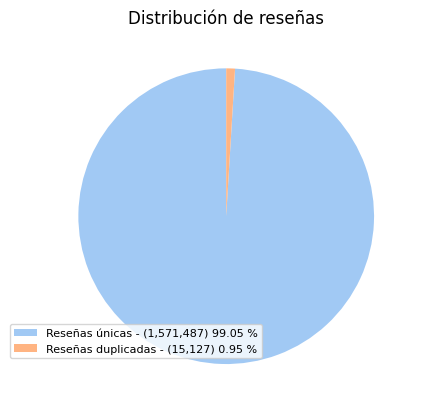

In [7]:
resenias_unicas = len (df_resenias_unicas)
resenias_duplicadas = total_resenias - resenias_unicas

data = [resenias_unicas, resenias_duplicadas]
labels = ['Reseñas únicas', 'Reseñas duplicadas']

y=np.array(data)
porcent = 100.*y/y.sum()

labels = ['{0} - ({2:,}) {1:1.2f} %'.format(i,j,h) for i,j,h in zip(labels, porcent, data)]

colors = sns.color_palette('pastel')[0:5]
plt.title('Distribución de reseñas')
plt.pie(data, colors = colors, startangle=90)
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 0.1), fontsize=8)
plt.show()

#### Guardamos el nuevo dataset

In [8]:
file_resenias_unicas = directorio_data + 'cervezas_resenias_unicas.csv'

df_resenias_unicas.to_csv(file_resenias_unicas, index=False)

In [9]:
df = pd.read_csv(file_resenias_unicas)
df.head(5)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5


## Valores nulos

### ¿Existen valores nulos?

In [10]:
df.loc[:, ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']].isna().sum()

review_overall           0
review_aroma             0
review_appearance        0
review_palate            0
review_taste             0
beer_abv             67429
dtype: int64

#### ¿Qué estrategias tenemos disponibles?

1. Interpolar: Estimar valores faltanes en función de los valores observados en las filas cercanas
1. Rellenar: 
    1. Valor por fijo por defecto.
    1. Valor calculado (p.e. media)
1. Imputar (un algoritmo que prediga el valor faltante)
1. Eliminar el registro

Pros y contras de cada estrategia


1. eliminar registro = volumnen de los registros
1. promedios = mala inferencia de
1. eliminar columna

#### Nuestra estrategia: eliminar si la cantidad de registros eliminados no es significativa

In [11]:
df.loc[:, ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']].isna().sum()

review_overall           0
review_aroma             0
review_appearance        0
review_palate            0
review_taste             0
beer_abv             67429
dtype: int64

In [12]:
resenias_unicas

1571487

Porcentaje perdido de registros

67429 / 1571487 * 100 = 4.29%

#### Marcamos los registros que se deben eliminar

In [13]:
df['eliminar'] = 'NO'

In [14]:
df.loc[df['beer_abv'].isnull(), ('eliminar')] = 'SI'

In [15]:
df.groupby(['eliminar'])['eliminar'].count()

eliminar
NO    1504058
SI      67429
Name: eliminar, dtype: int64

review fuera de rango (0-5) review <0 review >5
review not integer
muy alejando


## Valores atipicos

#### ¿Qué es un valor atípico?

(tomado de wikipedia sin permiso)

En estadística, tales como muestras estratificadas, un valor atípico (en inglés outlier) es una observación que es numéricamente distante del resto de los datos

Los valores atípicos son en ocasiones una cuestión subjetiva, y existen numerosos métodos para clasificarlos. El método más impartido académicamente por su sencillez y resultados es el test de Tukey, que toma como referencia la diferencia entre el primer cuartil y el tercer cuartil, o rango intercuartílico. En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa distancia de uno de esos cuartiles (atípico leve) o a 3 veces esa distancia (atípico extremo).

#### ¿Está bien o mal que haya valores atípicos?

1. Edades
1. Pesos
1. Temperaturas

#### Ejemplo de cálculo de valores atípicos o outliers

In [16]:
tmp_data = np.array([
    1,                #1
    4,                #2
    5,                #3
    7,                #4   <= (Q1)
    20,               #5
    25,               #6
    26,               #7   <= mediana (Q2)
    30,               #8
    35,               #9
    37,               #10  <= (Q3)
    39,               #11
    145,              #12
    320              #13
])

In [17]:
pos_q2 = np.ceil(50*len(tmp_data)/100)
pos_q2

7.0

In [18]:
pos_q1 = np.ceil(25*len(tmp_data)/100)
pos_q1

4.0

In [19]:
pos_q3 = np.ceil(75*len(tmp_data)/100)
pos_q3

10.0

#### Q1: cuartil 1 (25% de los datos)

In [20]:
q1 = np.quantile(tmp_data, 0.25, method='midpoint')
q1

7.0

#### Q2: cuartil 2 (50% de los datos, tambien llamado mediana)

In [21]:
q2 = np.quantile(tmp_data, 0.5)
q2

26.0

#### Q3: cuartil 3 (75% de los datos)

In [22]:
q3 = np.quantile(tmp_data, 0.75, method='midpoint')
q3

37.0

#### Rango intercuartílico (Q3 - Q1)

In [23]:
ri = q3 - q1
ri

30.0

#### Valores atipicos leves (valores entre  Q1 - 1.5*ri)

In [24]:
q1 - 1.5*ri

-38.0

In [25]:
min(tmp_data[tmp_data >= -38])

1

#### Bigote superior (valores superiores a  Q3 - 1.5*ri )

In [26]:
q3 + 1.5*ri

82.0

In [27]:
max(tmp_data[tmp_data <= 82])

39

In [28]:
tmp_data[np.where(tmp_data > q3 + 1.5*ri)]

array([145, 320])

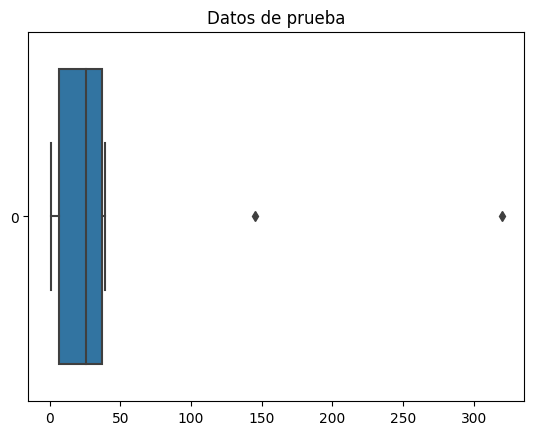

In [29]:
data = tmp_data
titulo = 'Datos de prueba'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review overall

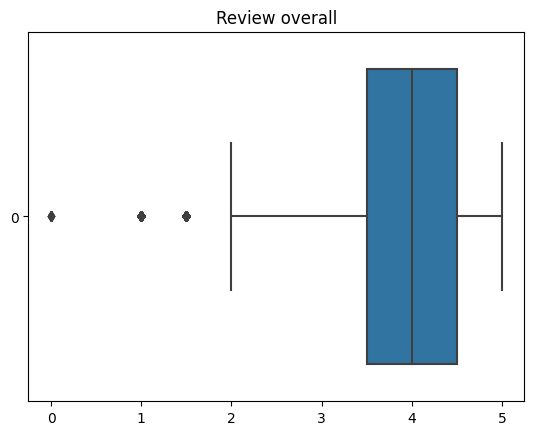

In [30]:
data = df['review_overall']
titulo = 'Review overall'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review aroma

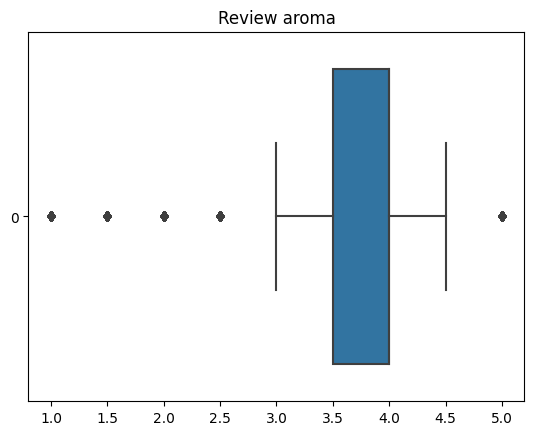

In [31]:
data = df['review_aroma']
titulo = 'Review aroma'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review appearance

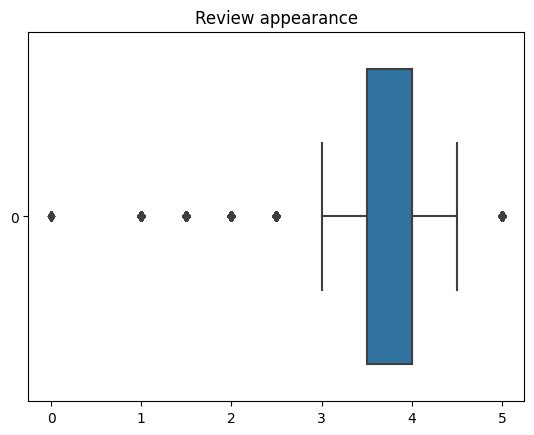

In [32]:
data = df['review_appearance']
titulo = 'Review appearance'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review palate

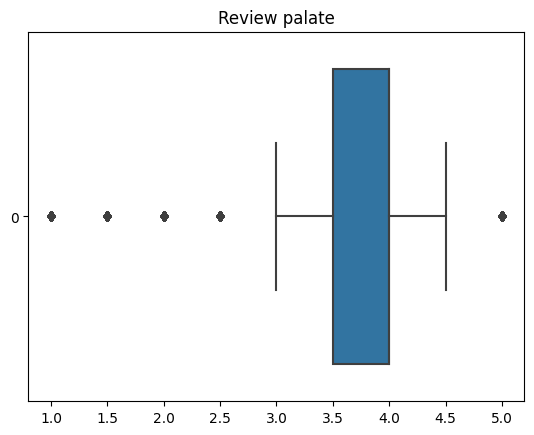

In [33]:
data = df['review_palate']
titulo = 'Review palate'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review taste

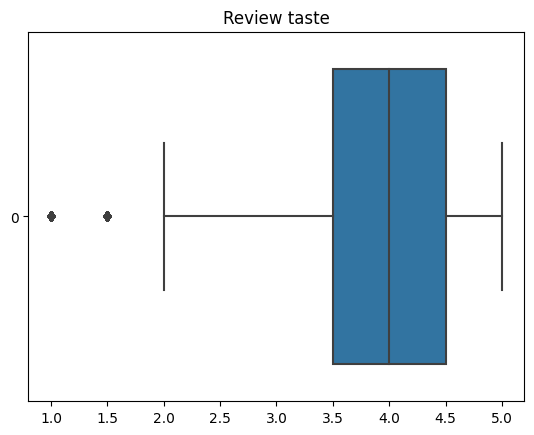

In [34]:
data = df['review_taste']
titulo = 'Review taste'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

#### Review abv

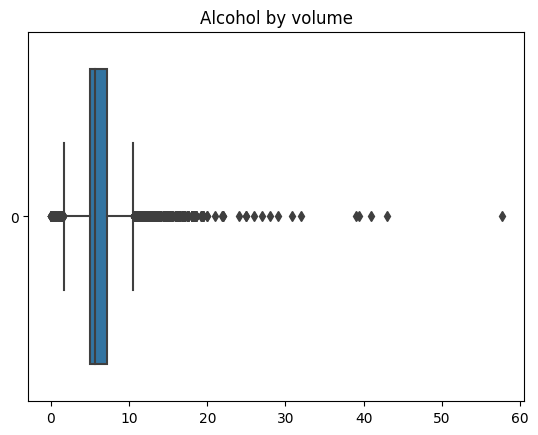

In [35]:
data = df.loc[:, ('beer_beerid', 'beer_abv')].drop_duplicates()['beer_abv']
titulo = 'Alcohol by volume'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

In [36]:
data_sin_nan = data[np.logical_not(np.isnan(data))]
q_1_2_3 = np.quantile(data_sin_nan, [0.25, 0.5, 0.75])
q_1_2_3

array([5. , 5.7, 7.2])

In [37]:
ri = q_1_2_3[2] - q_1_2_3[0]
ri

2.2

In [38]:
outliers_superiores = q_1_2_3[2] + 1.5*ri
outliers_superiores

10.5

In [39]:
data_sin_nan[data_sin_nan > outliers_superiores]

1857       12.0
2207       10.9
2587       11.1
2632       11.0
3346       11.3
           ... 
1570314    11.0
1570360    12.0
1570470    11.1
1570836    12.0
1571372    15.0
Name: beer_abv, Length: 1630, dtype: float64

In [40]:
tmp_data = df[['beer_beerid', 'beer_name', 'brewery_id', 'brewery_name', 'beer_style', 'beer_abv']].drop_duplicates()

tmp_data[(~tmp_data['beer_abv'].isnull()) & (tmp_data['beer_abv']>outliers_superiores)].sort_values(by=['beer_abv'], ascending=False)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv
12831,73368,Schorschbräu Schorschbock 57%,6513,Schorschbräu,Eisbock,57.70
12851,57856,Schorschbräu Schorschbock 43%,6513,Schorschbräu,Eisbock,43.00
739299,57015,Sink The Bismarck!,16315,BrewDog,American Double / Imperial IPA,41.00
12846,55712,Schorschbräu Schorschbock 40%,6513,Schorschbräu,Eisbock,39.44
986708,70633,Black Damnation VI - Messy,15237,De Struise Brouwers,American Double / Imperial Stout,39.00
...,...,...,...,...,...,...
1274381,68800,Papsø 15K Belgisk Quadrupel,23295,Søkildegaard,Quadrupel (Quad),10.60
1360980,4351,Carlsberg Master Brew,721,Carlsberg Danmark A/S,Euro Strong Lager,10.60
1125536,46467,Cascade Vlad The Imp Aler,2391,Cascade Brewing / Raccoon Lodge & Brewpub,American Wild Ale,10.60
1367643,13874,Devil's Milk,1924,DuClaw Brewing Company,American Barleywine,10.60


### Definiendo la popularidad

#### Numero de catadores

In [41]:
numero_de_catadores = len(pd.unique(df['review_profilename']))
numero_de_catadores

33387

  #### Nos quedamos solo con las cervezas que no hay que eliminar

In [42]:
df2 = df[df['eliminar'] == 'NO'].copy().drop(['eliminar'], axis=1)
df2

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,review_profilename,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,Sausa Weizen,10325,Vecchio Birraio,Hefeweizen,5.0,stcules,1234817823,1.5,2.0,2.5,1.5,1.5
1,48213,Red Moon,10325,Vecchio Birraio,English Strong Ale,6.2,stcules,1235915097,3.0,2.5,3.0,3.0,3.0
2,48215,Black Horse Black Beer,10325,Vecchio Birraio,Foreign / Export Stout,6.5,stcules,1235916604,3.0,2.5,3.0,3.0,3.0
3,47969,Sausa Pils,10325,Vecchio Birraio,German Pilsener,5.0,stcules,1234725145,3.0,3.0,3.5,2.5,3.0
4,64883,Cauldron DIPA,1075,Caldera Brewing Company,American Double / Imperial IPA,7.7,johnmichaelsen,1293735206,4.0,4.5,4.0,4.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571482,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,maddogruss,1162684892,5.0,4.0,3.5,4.0,4.0
1571483,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,yelterdow,1161048566,4.0,5.0,2.5,2.0,4.0
1571484,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,TongoRad,1160702513,4.5,3.5,3.0,3.5,4.0
1571485,33061,The Horseman's Ale,14359,The Defiant Brewing Company,Pumpkin Ale,5.2,dherling,1160023044,4.0,4.5,4.5,4.5,4.5


#### Agrupamos por cerveza para obtener la cantidad de puntuaciones y calculo de promedios en las puntuaciones

In [43]:
df = df2.groupby(['beer_beerid', 'beer_name', 'brewery_id', 'brewery_name', 'beer_style', 'beer_abv']).agg(
    votaciones = pd.NamedAgg(column='review_profilename', aggfunc='count'),
    review_overall = pd.NamedAgg(column='review_overall', aggfunc='mean'),
    review_aroma = pd.NamedAgg(column='review_aroma', aggfunc='mean'),
    review_appearance = pd.NamedAgg(column='review_appearance', aggfunc='mean'),
    review_palate = pd.NamedAgg(column='review_palate', aggfunc='mean'),
    review_taste = pd.NamedAgg(column='review_taste', aggfunc='mean'),
)

df['porcentaje_catadores'] = df['votaciones'] / numero_de_catadores * 100
df.drop(['votaciones'], axis=1)
df = df.reset_index()
df.sort_values(by=['porcentaje_catadores'], ascending=False)

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,votaciones,review_overall,review_aroma,review_appearance,review_palate,review_taste,porcentaje_catadores
1376,2093,90 Minute IPA,10099,Dogfish Head Brewery,American Double / Imperial IPA,9.0,3206,4.146912,4.213818,4.191672,4.179975,4.327667,9.602540
298,412,Old Rasputin Russian Imperial Stout,112,North Coast Brewing Co.,Russian Imperial Stout,9.0,3038,4.173963,4.199144,4.372120,4.229427,4.342495,9.099350
1255,1904,Sierra Nevada Celebration Ale,140,Sierra Nevada Brewing Co.,American IPA,6.8,2929,4.167805,4.081427,4.224821,4.074599,4.187948,8.772876
2594,4083,Stone Ruination IPA,147,Stone Brewing Co.,American Double / Imperial IPA,7.7,2644,4.163389,4.342852,4.180598,4.183245,4.350983,7.919250
66,92,Arrogant Bastard Ale,147,Stone Brewing Co.,American Strong Ale,7.2,2633,4.079947,4.119445,4.295480,4.144132,4.279719,7.886303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27522,46542,Flanders Red,2391,Cascade Brewing / Raccoon Lodge & Brewpub,Flanders Red Ale,6.3,1,4.500000,4.500000,4.000000,4.000000,4.000000,0.002995
27517,46535,Gråskägg,17975,Strömsholms Brygghus & Pub,Winter Warmer,5.2,1,3.500000,4.000000,3.500000,3.500000,4.000000,0.002995
27515,46533,Kleen,17975,Strömsholms Brygghus & Pub,English Dark Mild Ale,3.3,1,3.000000,3.500000,4.000000,3.500000,3.500000,0.002995
27513,46530,Bonnie Jean's Scottish Ale,4712,"Brewhouse, The",Scotch Ale / Wee Heavy,10.3,1,4.000000,3.500000,3.000000,4.000000,4.000000,0.002995


In [44]:
total_de_cervezas =len(df)
total_de_cervezas

49000

In [45]:
txt = "{porcentaje_de_cervezas:.4f}% de cervezas fueron probadas por al menos el {porcentaje_catadores:.3f}% de los catadores"

for porcentaje_de_cata in [10,9.5,9,8.5,8,7.5,7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.04,0.03,0.02,0.01,0.005,0.004,0.003,0.002]:
    porcentaje_de_cervezas =len(df[df['porcentaje_catadores'] > porcentaje_de_cata]) / total_de_cervezas * 100
    print(txt.format(porcentaje_catadores = porcentaje_de_cata, porcentaje_de_cervezas = porcentaje_de_cervezas))

0.0000% de cervezas fueron probadas por al menos el 10.000% de los catadores
0.0020% de cervezas fueron probadas por al menos el 9.500% de los catadores
0.0041% de cervezas fueron probadas por al menos el 9.000% de los catadores
0.0061% de cervezas fueron probadas por al menos el 8.500% de los catadores
0.0061% de cervezas fueron probadas por al menos el 8.000% de los catadores
0.0163% de cervezas fueron probadas por al menos el 7.500% de los catadores
0.0367% de cervezas fueron probadas por al menos el 7.000% de los catadores
0.0449% de cervezas fueron probadas por al menos el 6.500% de los catadores
0.0571% de cervezas fueron probadas por al menos el 6.000% de los catadores
0.0776% de cervezas fueron probadas por al menos el 5.500% de los catadores
0.1082% de cervezas fueron probadas por al menos el 5.000% de los catadores
0.1388% de cervezas fueron probadas por al menos el 4.500% de los catadores
0.2020% de cervezas fueron probadas por al menos el 4.000% de los catadores
0.2776% de 

In [46]:
porcentaje_de_cata = 1

df['POPULAR'] = 'NO'
df.loc[df['porcentaje_catadores']>porcentaje_de_cata, 'POPULAR'] = 'SI'

df.groupby(['POPULAR'])['POPULAR'].size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

,POPULAR,counts
0,NO,48002
1,SI,998


In [47]:
file_puntuacion_agrupada = directorio_data + 'cerveza_puntuacion_agrupada_total.csv'

df.to_csv(file_puntuacion_agrupada, index=False)
df

,beer_beerid,beer_name,brewery_id,brewery_name,beer_style,beer_abv,votaciones,review_overall,review_aroma,review_appearance,review_palate,review_taste,porcentaje_catadores,POPULAR
0,5,Amber,3,Abita Brewing Co.,Vienna Lager,4.5,420,3.554762,3.208333,3.488095,3.323810,3.342857,1.257975,SI
1,6,Turbodog,3,Abita Brewing Co.,English Brown Ale,5.6,871,3.707807,3.515499,3.839839,3.513777,3.644087,2.608800,SI
2,7,Purple Haze,3,Abita Brewing Co.,Fruit / Vegetable Beer,4.2,655,3.269466,3.177099,3.250382,3.107634,3.101527,1.961841,SI
3,8,Wheat,3,Abita Brewing Co.,American Adjunct Lager,4.2,68,3.647059,3.080882,3.294118,3.301471,3.235294,0.203672,NO
4,9,Golden,3,Abita Brewing Co.,American Pale Lager,4.2,116,3.400862,2.853448,3.051724,3.103448,3.043103,0.347441,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,77312,White Dog Norwegian Wheat Beer,18604,Lervig Aktiebryggeri AS,Witbier,4.7,1,4.000000,3.000000,4.500000,3.500000,4.500000,0.002995,NO
48996,77313,Aass Gourmet Pale Ale,185,Aass Brewery,American Blonde Ale,4.7,1,3.000000,3.000000,4.000000,3.000000,3.000000,0.002995,NO
48997,77314,Betty Brown Norwegian Brwon Ale,18604,Lervig Aktiebryggeri AS,American Brown Ale,4.7,1,3.500000,3.500000,4.000000,3.000000,4.000000,0.002995,NO
48998,77315,Icelandic White Beer,27839,Einstök Ölgerð,Witbier,5.2,1,3.500000,4.500000,3.000000,3.000000,3.500000,0.002995,NO


### ¿Qué es training, qué es testing y qué es validación?

* Training: un conjunto de datos que utilizamos para generar el modelo
* Validation: un conjunto de datos que utilizamos para obtener las métricas de nuestro modelo
* Testing: un conjunto de datos del que se desconoce la clase objetivo, generalmente este es el dataset final sobre el que nuestro modelo debe generar las predicciones

Usualmente, los términos testing y validación se suelen utilizar indistintamente.

![image info](../img/Sets.png)

In [48]:
X = df[["beer_beerid", "review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]]
y = df["POPULAR"]
X_training, X_testing, y_traininig, y_testing = train_test_split(X, y, train_size=0.8, stratify=y)

x_training_file = directorio_data + 'x_traininig.csv'
y_training_file = directorio_data + 'y_traininig.csv'
x_testing_file = directorio_data + 'x_testing.csv'
y_testing_file = directorio_data + 'y_testing.csv'

X_training.to_csv(x_training_file, index=False)
y_traininig.to_csv(y_training_file, index=False)

X_testing.to_csv(x_testing_file, index=False)
y_testing.to_csv(y_testing_file, index=False)

In [49]:
y_traininig.value_counts(normalize=True)

POPULAR
NO    0.979643
SI    0.020357
Name: proportion, dtype: float64

In [50]:
y_testing.value_counts(normalize=True)

POPULAR
NO    0.979592
SI    0.020408
Name: proportion, dtype: float64